#Code chạy trên Google Colab

# eGov-Bot — Exploratory Data Analysis (Colab-ready)

This notebook performs EDA step-by-step.

## 1) Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Run in Colab or local Jupyter
import os, zipfile, json
import pandas as pd

RAW_JSON_PATH = "/content/drive/MyDrive/eGov-Bot/EDA/data.json"


with open(RAW_JSON_PATH,'r',encoding='utf-8') as f:
    data = json.load(f)
print("Records:", len(data))
df = pd.json_normalize(data)
df.head(3)

Records: 12361


,ten_thu_tuc,cach_thuc_thuc_hien,thanh_phan_ho_so,trinh_tu_thuc_hien,co_quan_thuc_hien,yeu_cau_dieu_kien,thu_tuc_lien_quan,nguon
0,"Đăng ký sửa đổi, bổ sung nội dung tổ chức hội ...",- Hình thức: Trực tiếp. Thời hạn: 7 Ngày làm v...,"- Đăng ký sửa đổi, bổ sung nội dung tổ chức Hộ...","- Thương nhân, tổ chức gửi hồ sơ đăng ký sửa đ...",Sở Công thương,KHÔNG QUY ĐỊNH,Không có thông tin,https://thutuc.dichvucong.gov.vn/p/home/dvc-tt...
1,"Đăng ký sửa đổi, bổ sung nội dung chương trình...",- Hình thức: Trực tiếp. Thời hạn: 5 Ngày làm v...,"- Đơn đăng ký sửa đổi, bổ sung nội dung chương...","- Thương nhân gửi hồ sơ đăng ký sửa đổi, bổ su...",Sở Công thương,KHÔNG QUY ĐỊNH,Không có thông tin,https://thutuc.dichvucong.gov.vn/p/home/dvc-tt...
2,"Thủ tục hải quan đối với khí, nguyên liệu xuất...",- Hình thức: Trực tuyến. Thời hạn: + Thời hạn ...,a) Tờ khai hàng hóa nhập khẩu theo các chỉ tiê...,Bước 1: Doanh nghiệp gửi hồ sơ đề nghị làm thủ...,Chi cục Hải quan,"+ Giấy chứng nhận đủ Điều kiện xuất khẩu, nhậ...",Không có thông tin,https://thutuc.dichvucong.gov.vn/p/home/dvc-tt...


## 2) Schema and missing-value summary

Show columns, types, and missing percentages.

In [4]:
import pandas as pd, numpy as np
print('Columns:', list(df.columns))
print(df.dtypes)
missing = (df.isna().mean()*100).round(2).sort_values(ascending=False)
missing[missing>0].to_frame('pct_missing(%)').head(50)

Columns: ['ten_thu_tuc', 'cach_thuc_thuc_hien', 'thanh_phan_ho_so', 'trinh_tu_thuc_hien', 'co_quan_thuc_hien', 'yeu_cau_dieu_kien', 'thu_tuc_lien_quan', 'nguon']
ten_thu_tuc            object
cach_thuc_thuc_hien    object
thanh_phan_ho_so       object
trinh_tu_thuc_hien     object
co_quan_thuc_hien      object
yeu_cau_dieu_kien      object
thu_tuc_lien_quan      object
nguon                  object
dtype: object


,pct_missing(%)


## 3) Presence counts for key fields

In [5]:
fields = ['ten_thu_tuc','cach_thuc_thuc_hien','thanh_phan_ho_so','trinh_tu_thuc_hien','co_quan_thuc_hien','yeu_cau_dieu_kien','thu_tuc_lien_quan','nguon']
present = {f: df[f].notna().sum() if f in df.columns else 0 for f in fields}
pd.DataFrame.from_dict(present, orient='index', columns=['present_count'])

,present_count
ten_thu_tuc,12361
cach_thuc_thuc_hien,12361
thanh_phan_ho_so,12361
trinh_tu_thuc_hien,12361
co_quan_thuc_hien,12361
yeu_cau_dieu_kien,12361
thu_tuc_lien_quan,12361
nguon,12361


Remark:

Tất cả dữ liệu đều không bị thiếu

## 4) Text length distributions (characters)

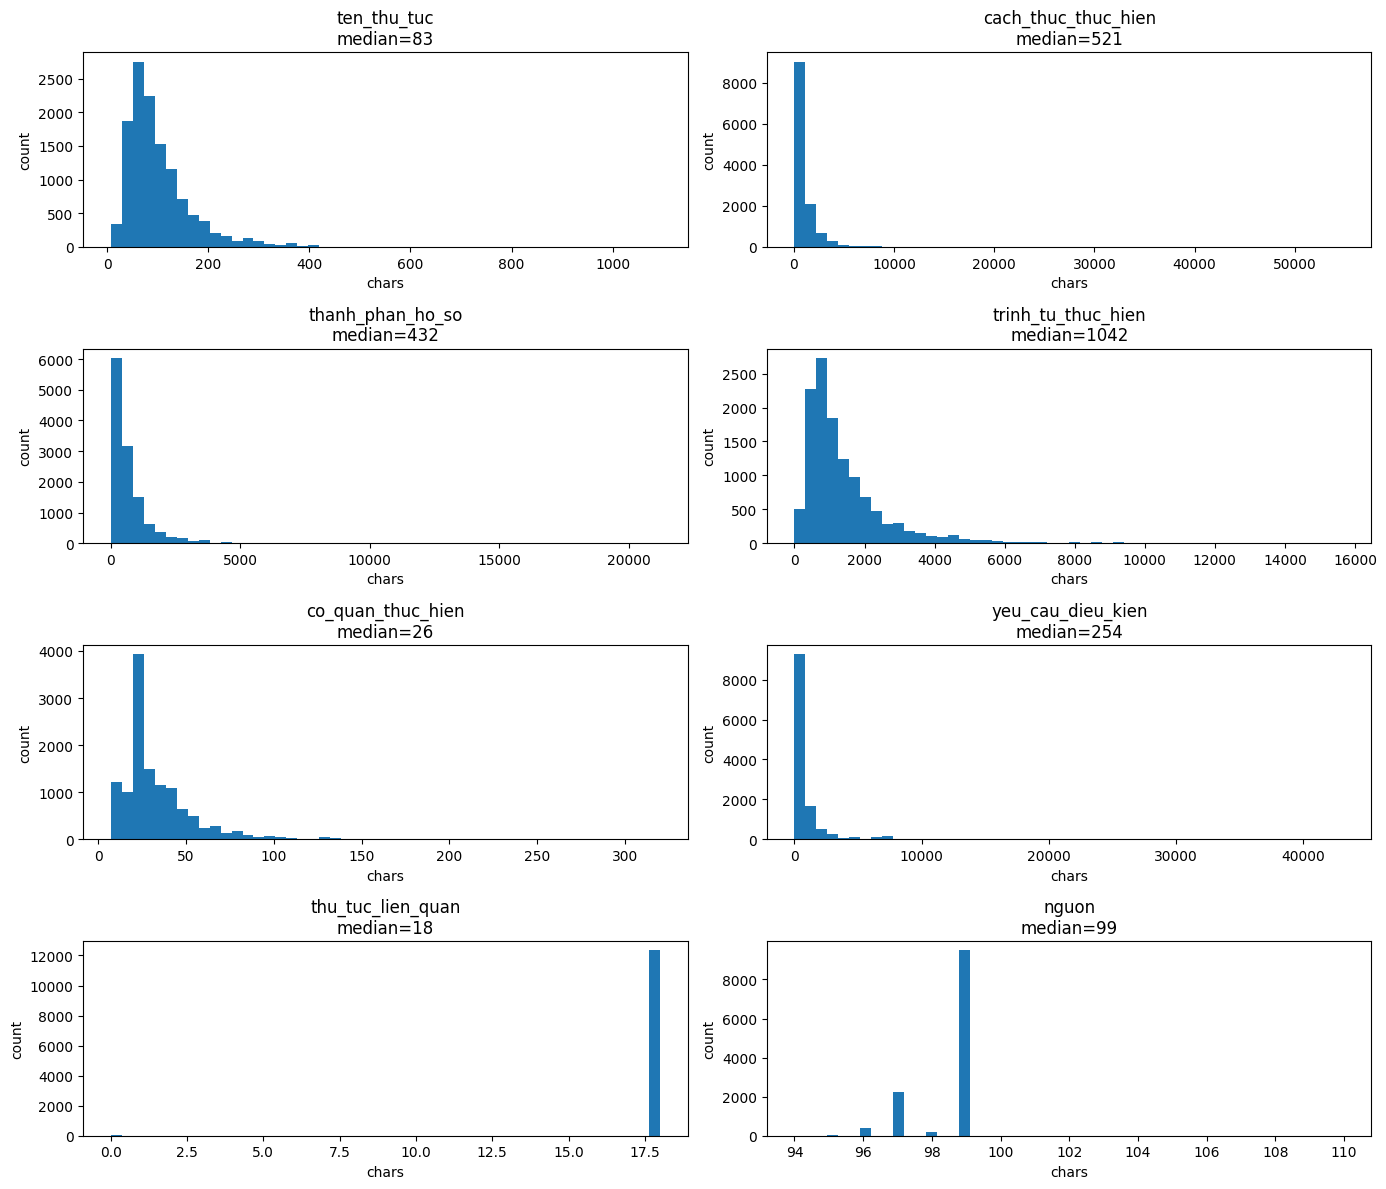

In [ ]:
import matplotlib.pyplot as plt

fields = ['ten_thu_tuc','cach_thuc_thuc_hien','thanh_phan_ho_so',
          'trinh_tu_thuc_hien','co_quan_thuc_hien','yeu_cau_dieu_kien',
          'thu_tuc_lien_quan','nguon']

# gom 2 biểu đồ / dòng
ncols = 2
nrows = (len(fields) + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 3*nrows))

for idx, f in enumerate(fields):
    if f in df.columns:
        lengths = df[f].fillna('').astype(str).map(len)
        ax = axes[idx // ncols, idx % ncols]
        ax.hist(lengths, bins=50)
        ax.set_title(f"{f}\nmedian={int(lengths.median())}")
        ax.set_xlabel("chars"); ax.set_ylabel("count")

# ẩn ô trống nếu số fields lẻ
for j in range(len(fields), nrows*ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.tight_layout()
plt.show()


## 5) Top implementing agencies

/tmp/ipython-input-1438261256.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=agency_counts.index, x=agency_counts.values, palette="Blues_r")


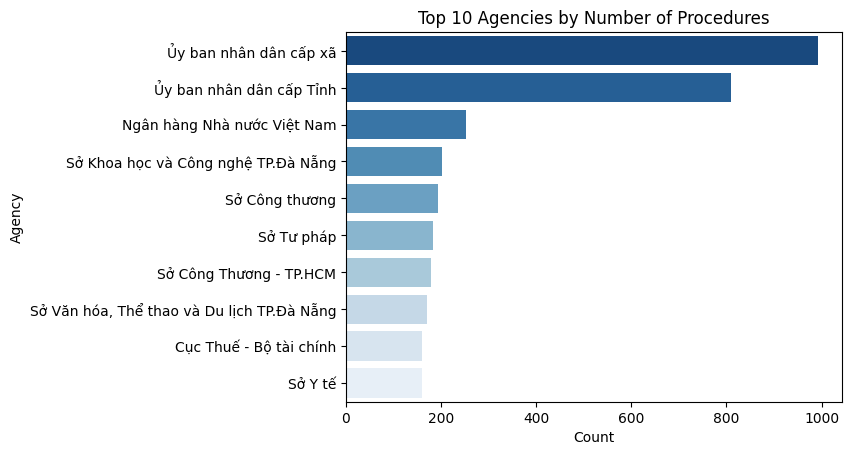

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

agency_counts = df["co_quan_thuc_hien"].value_counts().head(10)

sns.barplot(y=agency_counts.index, x=agency_counts.values, palette="Blues_r")
plt.title("Top 10 Agencies by Number of Procedures")
plt.xlabel("Count")
plt.ylabel("Agency")
plt.show()

#6) Cheking



🔎 Insight: Giá trị phổ biến nhất ở cột `yeu_cau_dieu_kien` là:
Không
👉 Xuất hiện 1336 lần.

🔎 Insight: Giá trị phổ biến nhất ở cột `thu_tuc_lien_quan` là:
Không có thông tin
👉 Xuất hiện 12328 lần.



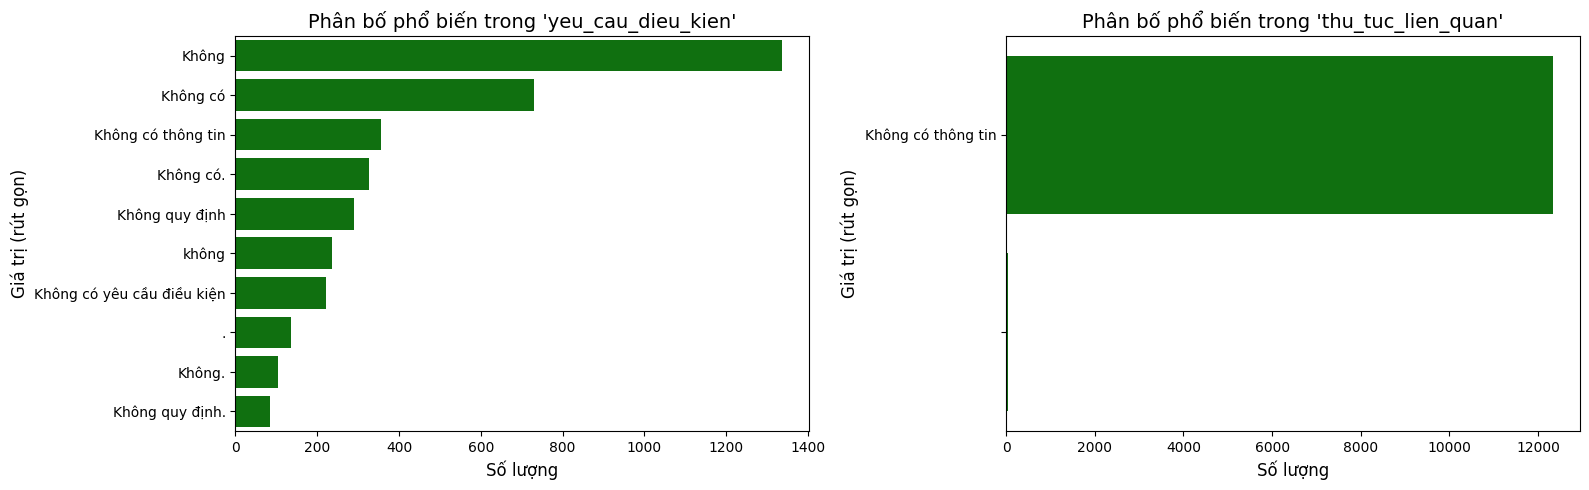

🔎 Insight: Giá trị phổ biến nhất ở cột `co_quan_thuc_hien` là:
Ủy ban nhân dân cấp xã
👉 Xuất hiện 993 lần.

🔎 Insight: Giá trị phổ biến nhất ở cột `cach_thuc_thuc_hien` là:
- Hình thức: Trực tiếp. Thời hạn: 5 Ngày làm việc. Phí: . Mô tả: 
- Hình thức: Trực tuyến. Thời hạn: 5 Ngày làm việc. Phí: . Mô tả: 
- Hình thức: Dịch vụ bưu chính. Thời hạn: 5 Ngày làm việc. Phí: . Mô tả: 
👉 Xuất hiện 49 lần.



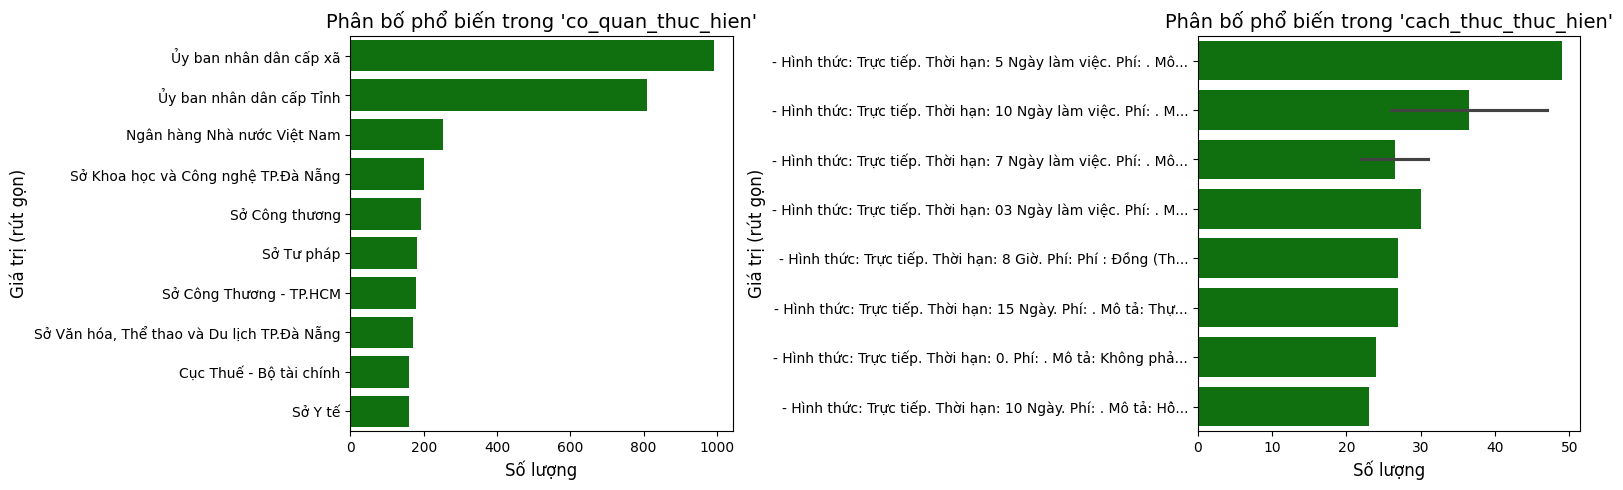

🔎 Insight: Giá trị phổ biến nhất ở cột `thanh_phan_ho_so` là:
Bản tóm tắt tình hình chuẩn bị các điều kiện kinh doanh hoạt động thể thao theo Mẫu số 03 ban hành kèm theo Nghị định số 36/2019/NĐ-CP ngày 29/4/2019 quy định chi tiết một số điều của Luật sửa đổi, bổ sung một số điều của Luật Thể dục, thể thao
Giấy chứng nhận đăng ký doanh nghiệp
Đơn đề nghị Cấp giấy chứng nhận đủ điều kiện kinh doanh hoạt động thể thao (theo mẫu số 02 Phụ lục III Nghị định số 31/2024/NĐ-CP ngày 15/3/2024)
👉 Xuất hiện 47 lần.



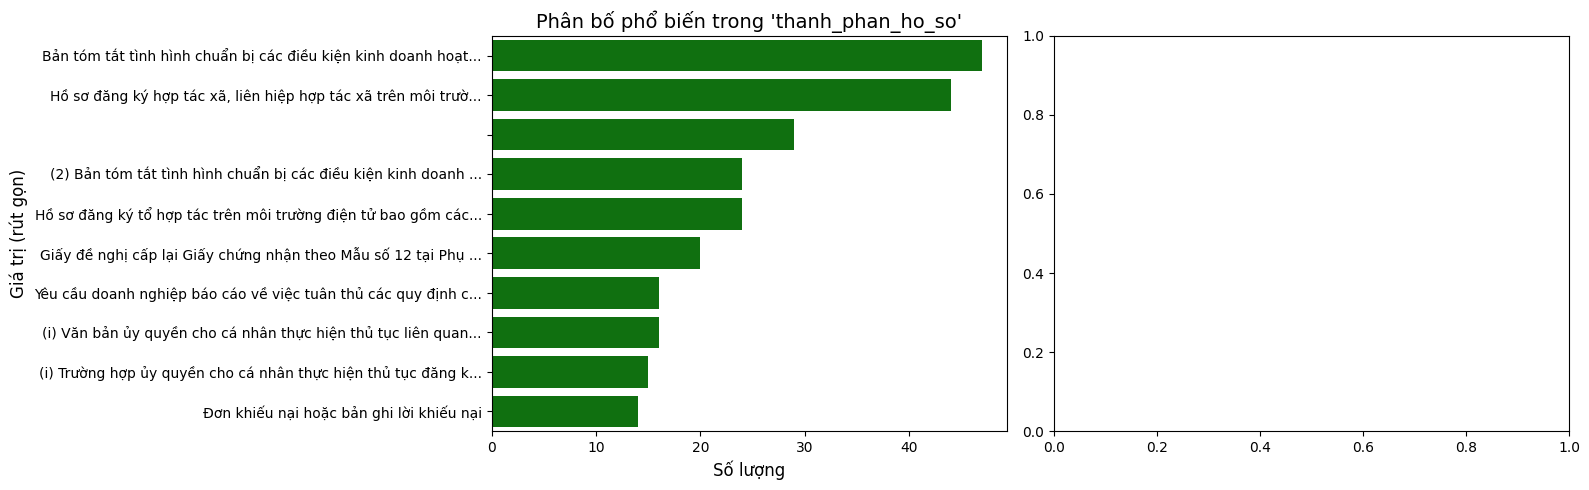

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hàm rút gọn text
def shorten(text, max_len=60):
    return text if len(text) <= max_len else text[:max_len] + "..."

# Các cột text cần phân tích
text_cols = [
    "yeu_cau_dieu_kien",
    "thu_tuc_lien_quan",
    "co_quan_thuc_hien",
    "cach_thuc_thuc_hien",
    "thanh_phan_ho_so"
]

# Lặp theo từng cặp cột (2 cột 1 hàng)
for i in range(0, len(text_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 hàng, 2 cột

    for j in range(2):
        if i + j < len(text_cols):  # tránh bị out of range khi số cột lẻ
            col = text_cols[i + j]
            counts = df[col].fillna("Không quy định").value_counts().head(10)

            sns.barplot(
                y=[shorten(x) for x in counts.index],
                x=counts.values,
                color="green",
                ax=axes[j]
            )
            axes[j].set_title(f"Phân bố phổ biến trong '{col}'", fontsize=14)
            axes[j].set_xlabel("Số lượng", fontsize=12)
            axes[j].set_ylabel("Giá trị (rút gọn)", fontsize=12)

            # In insight
            top_val = counts.index[0]
            top_freq = counts.values[0]
            print(f"🔎 Insight: Giá trị phổ biến nhất ở cột `{col}` là:\n{top_val}\n👉 Xuất hiện {top_freq} lần.\n")

    plt.tight_layout()
    plt.show()


**Remark:

==>cần chuẩn hóa các giá trị yeu_cau_dieu_kien: "không","không quy định",...về "Không quy định"

In [7]:
#mapping các giá trị yeu_cau_dieu_kien "không","không quy định",...về "không quy định"
df['yeu_cau_dieu_kien'] = df['yeu_cau_dieu_kien'].replace(['Không quy định','Không có yêu cầu điều kiện'
'Không','Không có','Không có thông tin','Không có.','không','Không có yêu cầu điều kiện','.','Không.','Không quy định.','KHÔNG QUY ĐỊNH'], 'Không quy định')

## 8) Top tokens

/tmp/ipython-input-1284471855.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(words, rotation=45, ha="right")


🔎 Insight: Trong cột 'ten_thu_tuc', từ khóa xuất hiện nhiều nhất là 'cấp' (3658 lần).


/tmp/ipython-input-1284471855.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(words, rotation=45, ha="right")


🔎 Insight: Trong cột 'thanh_phan_ho_so', từ khóa xuất hiện nhiều nhất là 'của' (34156 lần).


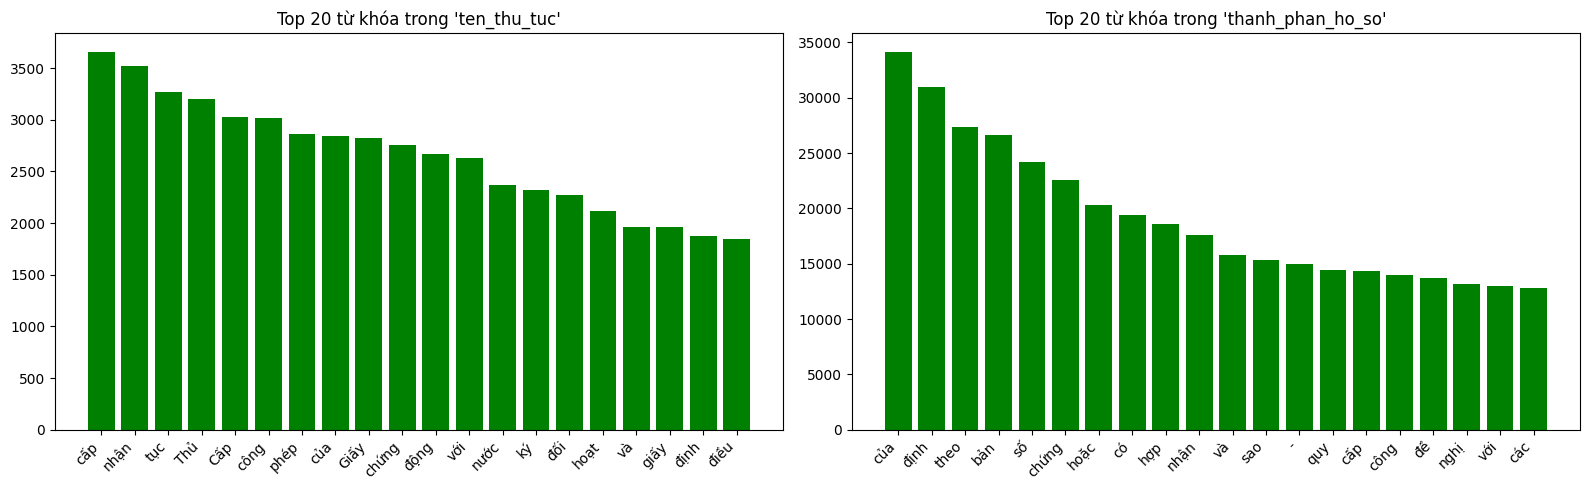

/tmp/ipython-input-1284471855.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(words, rotation=45, ha="right")


🔎 Insight: Trong cột 'trinh_tu_thuc_hien', từ khóa xuất hiện nhiều nhất là 'hồ' (81020 lần).


/tmp/ipython-input-1284471855.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(words, rotation=45, ha="right")


🔎 Insight: Trong cột 'cach_thuc_thuc_hien', từ khóa xuất hiện nhiều nhất là 'ngày' (70418 lần).


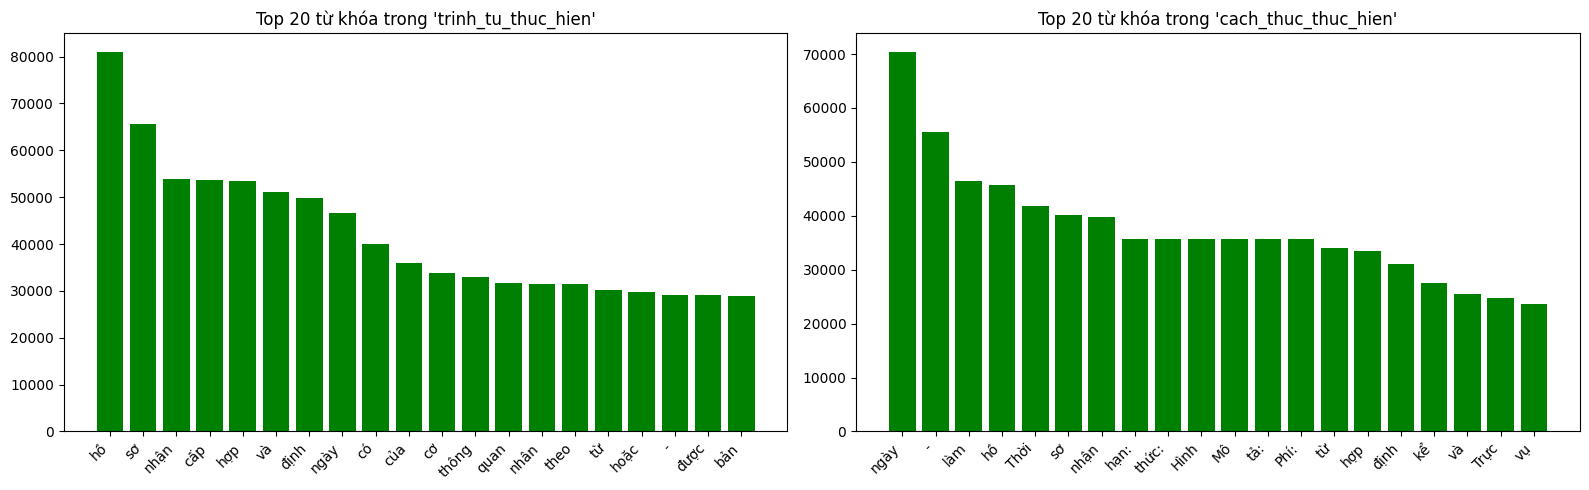

/tmp/ipython-input-1284471855.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(words, rotation=45, ha="right")
/tmp/ipython-input-1284471855.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(words, rotation=45, ha="right")


🔎 Insight: Trong cột 'yeu_cau_dieu_kien', từ khóa xuất hiện nhiều nhất là 'của' (32293 lần).
🔎 Insight: Trong cột 'thu_tuc_lien_quan', từ khóa xuất hiện nhiều nhất là 'Không' (12338 lần).


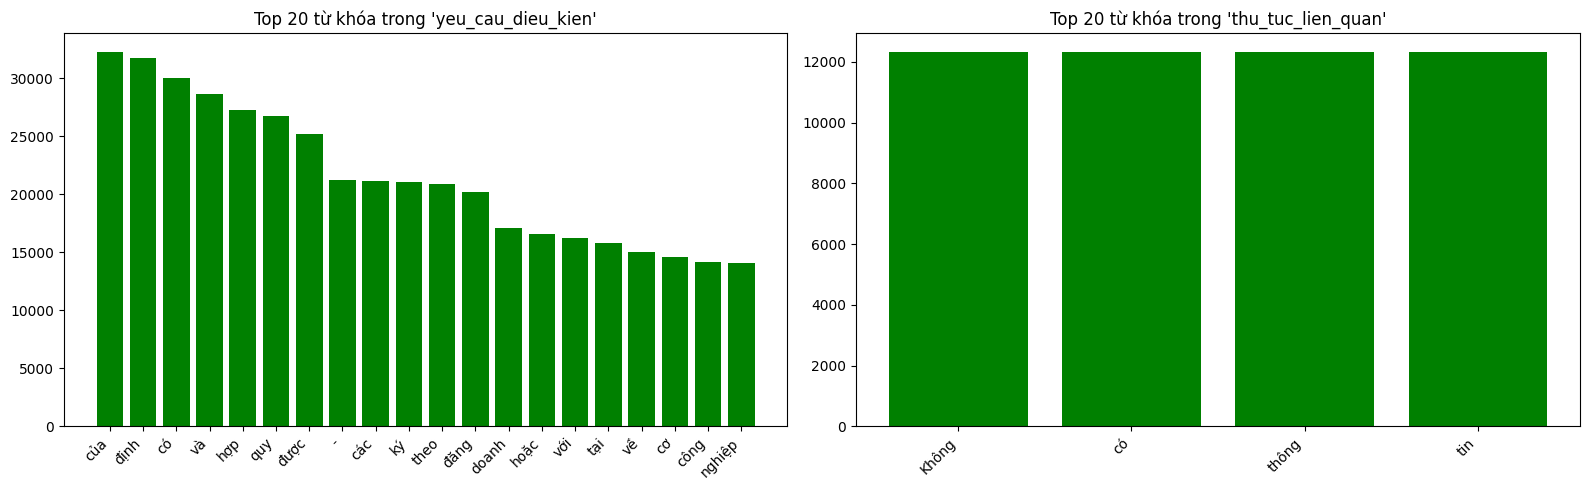

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Các trường text cần phân tích từ khóa
text_cols = [
    "ten_thu_tuc",
    "thanh_phan_ho_so",
    "trinh_tu_thuc_hien",
    "cach_thuc_thuc_hien",
    "yeu_cau_dieu_kien",
    "thu_tuc_lien_quan"
]

def plot_top_keywords(ax, df, col, top_n=20):
    """Hàm vẽ top từ khóa phổ biến trong 1 cột text lên subplot ax"""
    all_text = " ".join(df[col].dropna().astype(str))
    word_freq = Counter(all_text.split())
    common_words = word_freq.most_common(top_n)

    if not common_words:
        ax.set_title(f"Cột {col} không có dữ liệu")
        ax.axis("off")
        return

    words, counts = zip(*common_words)
    ax.bar(words, counts, color="green")
    ax.set_xticklabels(words, rotation=45, ha="right")
    ax.set_title(f"Top {top_n} từ khóa trong '{col}'")

    # Insight in ra console
    print(f"🔎 Insight: Trong cột '{col}', từ khóa xuất hiện nhiều nhất là '{words[0]}' ({counts[0]} lần).")

# Lặp qua từng cặp cột (2 cột / hàng)
for i in range(0, len(text_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    for j in range(2):
        if i + j < len(text_cols):  # tránh index lỗi nếu số cột lẻ
            plot_top_keywords(axes[j], df, text_cols[i+j], top_n=20)
        else:
            axes[j].axis("off")

    plt.tight_layout()
    plt.show()


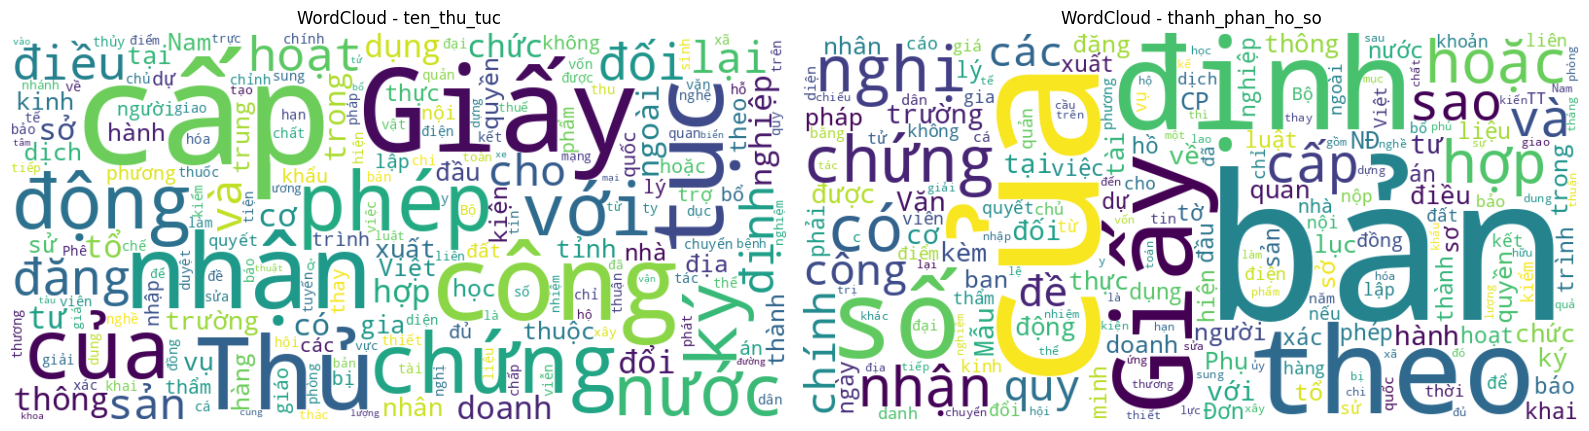

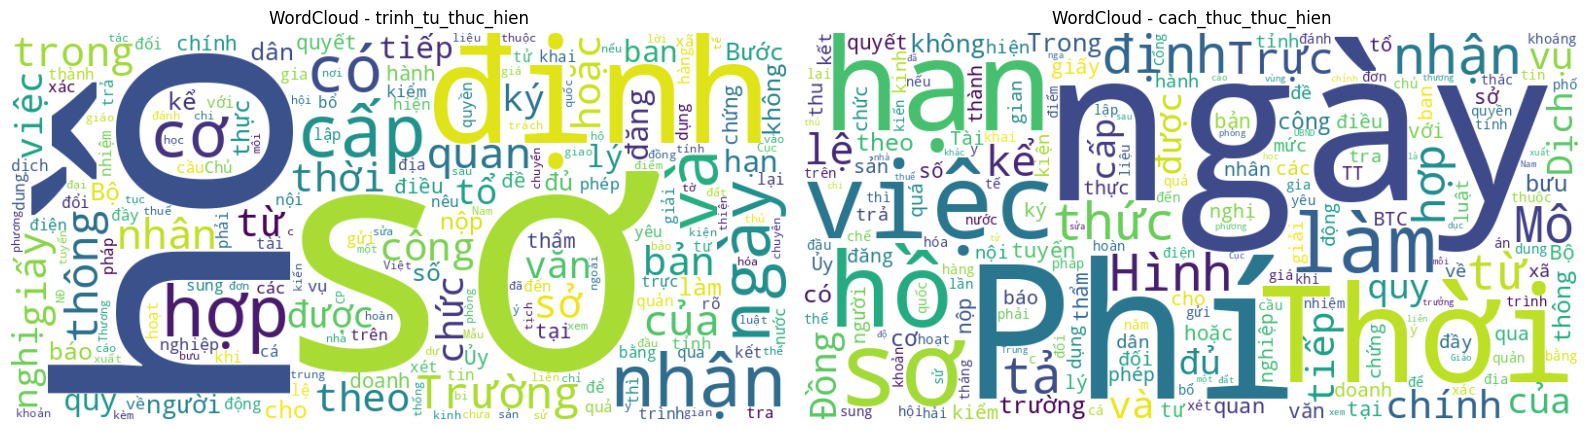

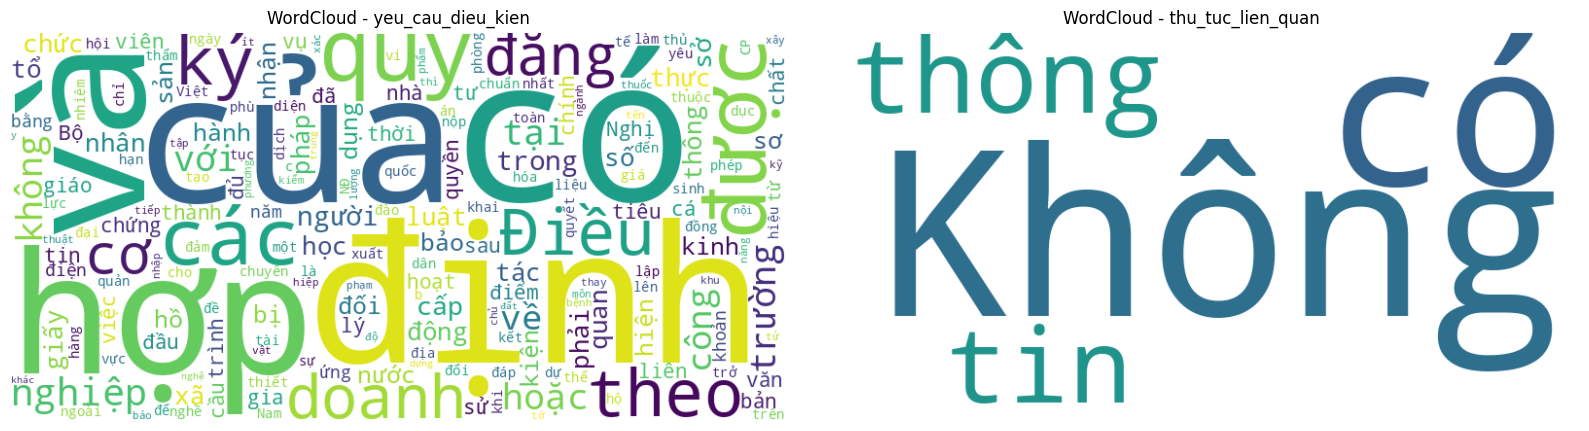

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Các cột text cần tạo WordCloud
text_cols = [
    "ten_thu_tuc",
    "thanh_phan_ho_so",
    "trinh_tu_thuc_hien",
    "cach_thuc_thuc_hien",
    "yeu_cau_dieu_kien",
    "thu_tuc_lien_quan"
]

def plot_wordcloud(ax, df, col):
    """Hàm vẽ WordCloud cho một cột text lên subplot ax"""
    text_all = " ".join(df[col].dropna().astype(str).tolist())
    if not text_all.strip():
        ax.set_title(f"{col} (không có dữ liệu)")
        ax.axis("off")
        return

    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        collocations=False
    ).generate(text_all)

    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"WordCloud - {col}")

# Vẽ theo từng cặp cột (2 biểu đồ / 1 dòng)
for i in range(0, len(text_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for j in range(2):
        if i + j < len(text_cols):  # tránh bị out of range nếu số cột lẻ
            plot_wordcloud(axes[j], df, text_cols[i+j])
        else:
            axes[j].axis("off")

    plt.tight_layout()
    plt.show()


#9) Heat Map

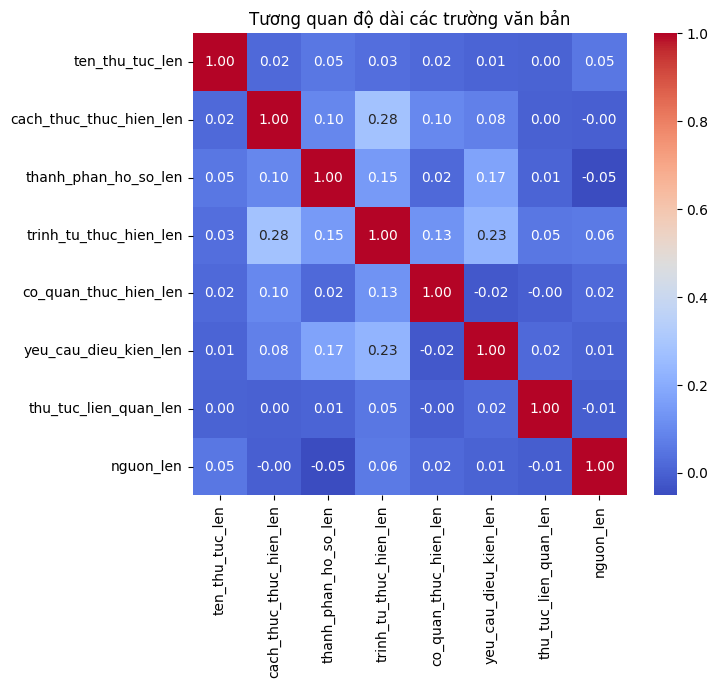

In [ ]:
# Add length columns to the DataFrame
text_fields = ['ten_thu_tuc','cach_thuc_thuc_hien','thanh_phan_ho_so','trinh_tu_thuc_hien', 'co_quan_thuc_hien', 'yeu_cau_dieu_kien', 'thu_tuc_lien_quan', 'nguon']
for f in text_fields:
    if f in df.columns:
        df[f'{f}_len'] = df[f].fillna('').astype(str).map(len)

# ========== 6. Heatmap tương quan độ dài giữa các trường ==========
len_cols = [c for c in df.columns if c.endswith("_len")]
corr = df[len_cols].corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Tương quan độ dài các trường văn bản")
plt.show()

#10) Save data_cleaned

In [ ]:
# Tìm tất cả các bản ghi có 'nguon' bị trùng
dups = df[df['nguon'].duplicated(keep=False)].copy()

# Gom nhóm theo 'nguon' để so sánh các cột khác
for nguon, group in dups.groupby('nguon'):
    print(f"\n=== Link: {nguon} ===")
    # Check từng cột xem có trùng hoàn toàn không
    for col in df.columns:
        if col == "nguon":
            continue
        unique_vals = group[col].unique()
        if len(unique_vals) == 1:
            print(f"✅ Cột '{col}' giống nhau ({unique_vals[0][:80]}...)")
        else:
            print(f"⚠️ Cột '{col}' khác nhau: {unique_vals}")


In [9]:
# Chuẩn hóa toàn bộ text: bỏ khoảng trắng dư, đổi về str, bỏ xuống dòng
df_clean = df.applymap(lambda x: str(x).strip().replace("\n", " ") if pd.notnull(x) else x)

# Xóa dòng trùng hoàn toàn
df_unique = df_clean.drop_duplicates()

print(f"Số dòng ban đầu: {len(df)}")
print(f"Số dòng sau khi loại trùng: {len(df_unique)}")


/tmp/ipython-input-3086359379.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df.applymap(lambda x: str(x).strip().replace("\n", " ") if pd.notnull(x) else x)


Số dòng ban đầu: 12361
Số dòng sau khi loại trùng: 12361


In [11]:
import json

# Xuất JSON chuẩn format
CLEAN_PATH = "/content/drive/MyDrive/eGov-Bot/EDA/toan_bo_du_lieu_final.json"

with open(CLEAN_PATH, "w", encoding="utf-8") as f:
    json.dump(
        df_unique.to_dict(orient="records"),
        f,
        ensure_ascii=False,   # giữ nguyên tiếng Việt
        indent=4              # thụt dòng cho đẹp
    )
